# **Chance of Admission for Higher Studies**

## **Objective**

The objective of this machine learning case study on Chance of Admission Analysis is to develop a predictive model that accurately estimates a student’s likelihood of being admitted to a graduate program based on various academic and extracurricular features. The dataset includes critical factors such as standardized test scores (GRE and TOEFL), academic performance (CGPA), university ratings, strength of Statement of Purpose (SOP) and Letters of Recommendation (LOR), prior research experience, and other relevant metrics.

Predict the chances of admission of a student to a Graduate program based on:

1. GRE Scores (290 to 340)
2. TOEFL Scores (92 to 120)
3. University Rating (1 to 5)
4. Statement of Purpose (1 to 5)
5. Letter of Recommendation Strength (1 to 5)
6. Undergraduate CGPA (6.8 to 9.92)
7. Research Experience (0 or 1)
8. Chance of Admit (0.34 to 0.97)

## **Data Source**


The dataset used for the Chance of Admission Analysis appears to be a commonly referenced dataset in academic and machine learning projects. It is publicly available and often found on platforms such as Kaggle, GitHub repositories, or educational websites. The dataset is typically credited to research and learning purposes for evaluating regression models in predictive analysis

## **Import Library**

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## **Import Data**

In [2]:
admission_data = pd.read_csv('/content/sample_data/Admission Chance.csv')

In [3]:
admission_data.head()

,Serial No,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


## **Describe Data**

In [4]:
admission_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No          400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4    SOP               400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [5]:
admission_data.describe()

,Serial No,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [6]:
admission_data.corr()

,Serial No,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No,1.000000,-0.097526,-0.147932,-0.169948,-0.166932,-0.088221,-0.045608,-0.063138,0.042336
GRE Score,-0.097526,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL Score,-0.147932,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
University Rating,-0.169948,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,-0.166932,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,-0.088221,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,-0.045608,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,-0.063138,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
Chance of Admit,0.042336,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


## **Data Visualization**

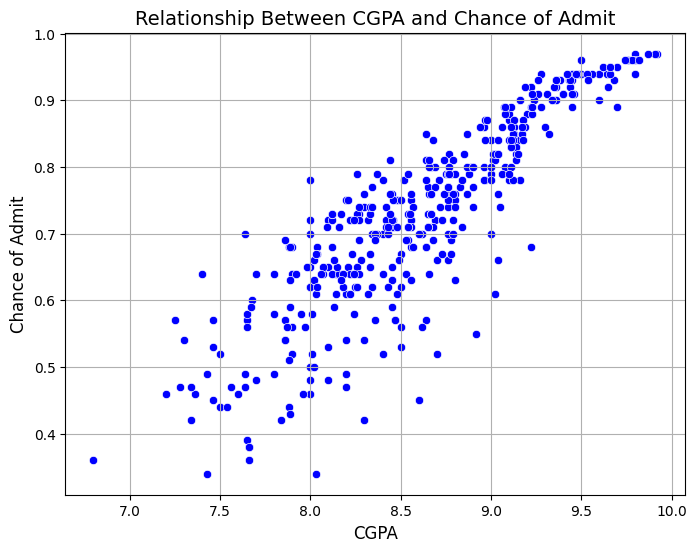

In [16]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=admission_data['CGPA'], y=admission_data['Chance of Admit '], color='blue')
plt.title("Relationship Between CGPA and Chance of Admit", fontsize=14)
plt.xlabel("CGPA", fontsize=12)
plt.ylabel("Chance of Admit", fontsize=12)
plt.grid(True)
plt.show()

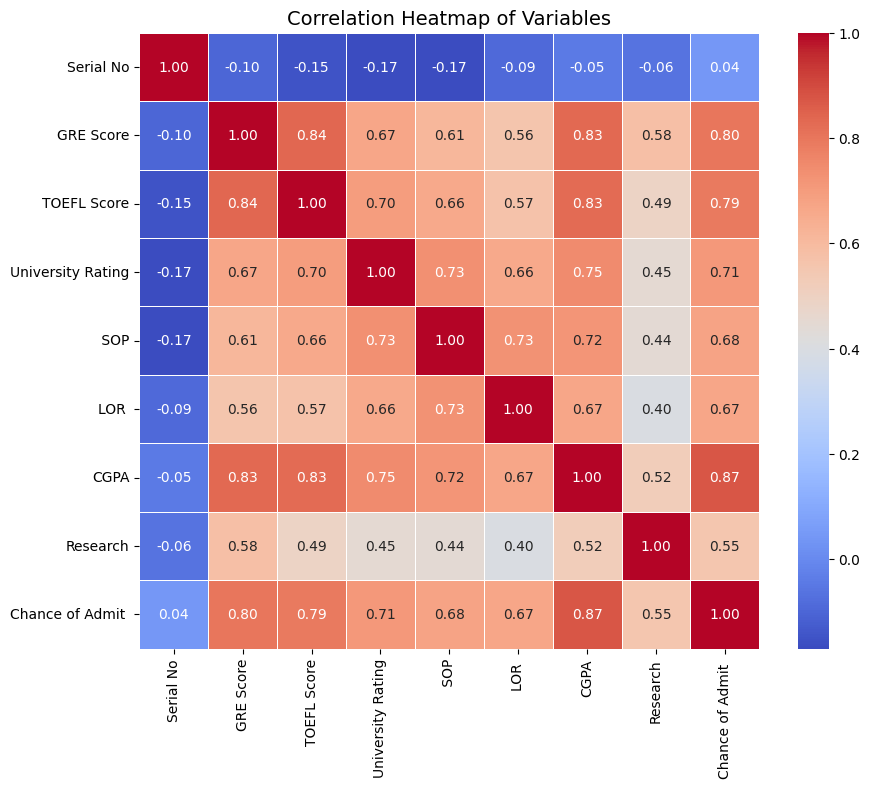

In [19]:
# Heatmap to visualize correlation between variables
plt.figure(figsize=(10, 8))
correlation_matrix = admission_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Variables', fontsize=14)
plt.show()

## **Data Preprocessing**

In [26]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [27]:
# Check for missing values
print(admission_data.isnull().sum())

Serial No            0
GRE Score            0
TOEFL Score          0
University Rating    0
 SOP                 0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64


In [28]:
# Handling missing values (if any)
admission_data.fillna(admission_data.mean(), inplace=True)

## **Define Target Variable (y) and Feature Variables (X)**

In [21]:
admission_data.columns

Index(['Serial No', 'GRE Score', 'TOEFL Score', 'University Rating', ' SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [22]:
y = admission_data['Chance of Admit ']

In [24]:
x = admission_data.drop(['Serial No', 'Chance of Admit '], axis=1)

## **Train Test Split**

In [72]:
from sklearn.model_selection import train_test_split

In [73]:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [74]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((320, 7), (80, 7), (320,), (80,))

## **Modeling**

In [77]:
from sklearn.tree import DecisionTreeRegressor

In [76]:
model = DecisionTreeRegressor(random_state=42)

In [79]:
model.fit(x_train, y_train)

DecisionTreeRegressor(random_state=42)

## **Model Prediction**

In [80]:
y_pred = model.predict(x_test)

In [81]:
y_pred

array([0.54, 0.73, 0.93, 0.81, 0.59, 0.91, 0.59, 0.38, 0.7 , 0.91, 0.79,
       0.93, 0.49, 0.88, 0.76, 0.75, 0.71, 0.44, 0.67, 0.97, 0.62, 0.67,
       0.63, 0.56, 0.95, 0.8 , 0.7 , 0.66, 0.69, 0.84, 0.8 , 0.94, 0.48,
       0.44, 0.72, 0.7 , 0.71, 0.73, 0.73, 0.93, 0.71, 0.72, 0.78, 0.94,
       0.88, 0.84, 0.97, 0.64, 0.93, 0.91, 0.92, 0.74, 0.8 , 0.95, 0.7 ,
       0.69, 0.72, 0.83, 0.59, 0.88, 0.61, 0.65, 0.63, 0.47, 0.73, 0.52,
       0.64, 0.89, 0.88, 0.85, 0.75, 0.84, 0.93, 0.9 , 0.54, 0.76, 0.75,
       0.5 , 0.87, 0.87])

## **Model Evaluation**

In [82]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [83]:
mean_squared_error(y_test, y_pred)

0.00947375

In [84]:
mean_absolute_error(y_test, y_pred)

0.066125

In [85]:
r2_score(y_test, y_pred)

0.6331325501680588

## **Explaination**

In the process of building a predictive model, several key steps are involved. First, we import essential libraries like numpy for numerical operations, seaborn and matplotlib for data visualization, and sklearn for machine learning tasks. Next, we import the dataset and examine its structure with methods like .head() and .describe() to understand the data’s summary statistics and distribution. We then visualize the relationships between features and the target variable using plots such as histograms, scatter plots, and correlation heatmaps to identify patterns and potential issues in the data.

\\
 Data preprocessing follows, including handling missing values, encoding categorical features, or scaling numerical data, ensuring the dataset is ready for modeling. After preprocessing, we define the features (x) and target variable (y), followed by splitting the data into training and testing sets using train_test_split. Once trained, the model is used to make predictions on the test set, and the model’s performance is evaluated using metrics like Mean Squared Error (MSE), Mean Absolute Error (MAE), and R-squared (R²), providing insights into how well the model generalizes to new data.